In [83]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
from keras.models import Sequential 
from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt




from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [57]:
EPOCHS=10
IMG_WIDTH=30
IMG_HEIGHT=30
NUM_CATEGORIES=43
TEST_SIZE=0.10

In [82]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    
    images=[]
    labels=[]
    
    for root, _, files in os.walk(data_dir):
        for file in files:
            if not file.startswith('.'):
                # Read in and resize image
                img = cv2.imread(os.path.join(root, file))
                img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))

                # Add current image and label to output lists
                images.append(img)
                labels.append(int(os.path.basename(root)))

    return (images, labels)


In [76]:
def get_model():
    model = tf.keras.models.Sequential([

        # Convolutional layer. Learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),

        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

        # 2nd convolutional layer. Learn 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)
        ),

        # Flatten units
        tf.keras.layers.Flatten(),

        # Add a hidden layer with dropout
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),

        # Add an output layer with output unit for all categories
        tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
    ])

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    model.summary()
    
    
    
    
    


# The model weights (that are considered the best) are loaded into the model.
    
    
    return model

In [105]:
def main():

    # Check command-line arguments
    if len(sys.argv) not in [1, 3]:
        sys.exit("Usage: python traffic.py data_directory [model.h5]")

    # Get image arrays and labels for all image files
    images, labels = load_data('C:\\Users\\jasmin olabi\\.conda\\envs\\tf\\Lib\\site-packages\\traffic\\gtsrb')
    # Split data into training and testing sets
    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=TEST_SIZE)
    
   
     
    # Get a compiled neural network
    model = get_model()
    
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    model.summary()
    
    #Add checkpoint
    checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5',verbose=1,save_best_only=True,
    monitor='val_accuracy',
    mode='max')
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2,monitor='val_loss'),
              tf.keras.callbacks.TensorBoard(log_dir='logs')]


    # Fit model on training data
    #validation_split allows  to automatically reserve part of  training data for validation which use 20%
    model.fit(x_train, y_train, batch_size=16, validation_split=0.2, epochs=EPOCHS,callbacks=callbacks)


    # Evaluate neural network performance
    model.evaluate(x_test,  y_test, verbose=2)
    
    print(len(sys.argv))

    # Save model to file
    if len(sys.argv) == 1:
        filename = 'C:\\Users\\jasmin olabi\\.conda\\envs\\tf\\Lib\\site-packages'
        model.save("filename.h5")
        print(f"Model Saved to {filename},")

In [88]:
if __name__ == "__main__":
    main()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               589952    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 43)              

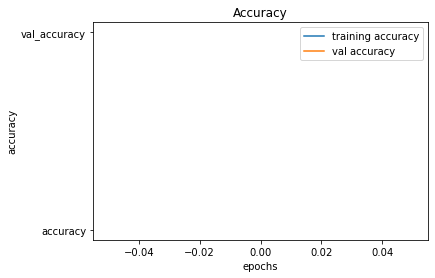

In [108]:
plt.figure(0)
plt.plot(['accuracy'], label='training accuracy')
plt.plot(['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

